In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime

In [2]:
clinico = pd.read_csv('ICL_NREVSS_Clinical_Labs.csv', skiprows=1)
publico = pd.read_csv('ICL_NREVSS_Public_Health_Labs.csv', skiprows=1)
ili = pd.read_csv('ILINet.csv', skiprows=1)

# Limpeza dados 
## 1- Clinico

In [3]:
clinico.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
233,National,X,2025,12,97442,6505,3950,10.72950,6.67577,4.05369
234,National,X,2025,13,90052,4458,3891,9.27131,4.95047,4.32084
235,National,X,2025,14,82103,2845,3415,7.62457,3.46516,4.15941
236,National,X,2025,15,74104,1771,2951,6.37213,2.38988,3.98224
237,National,X,2025,16,63566,1173,2358,5.55486,1.84533,3.70953


In [4]:
clinico = clinico.drop(columns=['REGION', 'REGION TYPE'])

In [5]:
clinico['TOTAL POSITIVE'] = clinico['TOTAL A'] + clinico['TOTAL B']

In [6]:
clinico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              238 non-null    int64  
 1   WEEK              238 non-null    int64  
 2   TOTAL SPECIMENS   238 non-null    int64  
 3   TOTAL A           238 non-null    int64  
 4   TOTAL B           238 non-null    int64  
 5   PERCENT POSITIVE  238 non-null    float64
 6   PERCENT A         238 non-null    float64
 7   PERCENT B         238 non-null    float64
 8   TOTAL POSITIVE    238 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 16.9 KB


# Limpeza dados 
## 2- Publico

In [7]:
publico.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v,A (H5)
233,National,X,2025,12,4324,1476,1046,262,144,143,0,0,0
234,National,X,2025,13,2685,765,477,152,133,123,0,0,0
235,National,X,2025,14,2360,688,440,104,157,127,0,0,0
236,National,X,2025,15,1632,356,183,50,121,153,0,0,0
237,National,X,2025,16,770,128,59,23,63,64,0,0,0


In [8]:
publico = publico.drop(columns=['REGION', 'REGION TYPE'])

In [9]:
publico['TOTAL A'] = publico['A (2009 H1N1)'] + publico['A (H3)'] + publico['A (Subtyping not Performed)'] + publico['A (H5)']

In [10]:
publico['TOTAL B'] = publico['B'] + publico['BVic'] + publico['BYam'] + publico['H3N2v']

In [11]:
publico['TOTAL POSITIVE'] = publico['TOTAL A'] + publico['TOTAL B']

In [12]:
publico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   YEAR                         238 non-null    int64
 1   WEEK                         238 non-null    int64
 2   TOTAL SPECIMENS              238 non-null    int64
 3   A (2009 H1N1)                238 non-null    int64
 4   A (H3)                       238 non-null    int64
 5   A (Subtyping not Performed)  238 non-null    int64
 6   B                            238 non-null    int64
 7   BVic                         238 non-null    int64
 8   BYam                         238 non-null    int64
 9   H3N2v                        238 non-null    int64
 10  A (H5)                       238 non-null    int64
 11  TOTAL A                      238 non-null    int64
 12  TOTAL B                      238 non-null    int64
 13  TOTAL POSITIVE               238 non-null    int64

In [13]:
publico = publico.drop(columns=['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v', 'A (H5)'])

In [14]:
publico.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE
233,2025,12,4324,2784,287,3071
234,2025,13,2685,1394,256,1650
235,2025,14,2360,1232,284,1516
236,2025,15,1632,589,274,863
237,2025,16,770,210,127,337


# Limpeza dados 
## 3- ILI

In [15]:
ili.tail()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
233,National,X,2025,12,3.31604,3.32813,15123,24192,X,28177,10048,10433,87973,4173,2643314
234,National,X,2025,13,2.95612,2.97203,13735,21534,X,25315,8396,8462,77442,4179,2605693
235,National,X,2025,14,2.61982,2.61412,12044,18649,X,21801,7314,7151,66959,4169,2561436
236,National,X,2025,15,2.45037,2.38458,11613,16700,X,19766,6470,6408,60957,4159,2556303
237,National,X,2025,16,2.27570,2.21627,11034,15477,X,17588,5911,6085,56095,4084,2531059


In [16]:
ili.drop(columns=['REGION', 'REGION TYPE', 'AGE 25-64'], inplace=True)

In [17]:
ili.drop(columns=['NUM. OF PROVIDERS'], inplace=True)

In [18]:
ili.tail()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,TOTAL PATIENTS
233,2025,12,3.31604,3.32813,15123,24192,28177,10048,10433,87973,2643314
234,2025,13,2.95612,2.97203,13735,21534,25315,8396,8462,77442,2605693
235,2025,14,2.61982,2.61412,12044,18649,21801,7314,7151,66959,2561436
236,2025,15,2.45037,2.38458,11613,16700,19766,6470,6408,60957,2556303
237,2025,16,2.27570,2.21627,11034,15477,17588,5911,6085,56095,2531059


# Unindo as tabelas e normalizando
## Clinico, publico e ILI

In [19]:
dados_somados = pd.concat([clinico, publico], ignore_index=True)
colunas_somar = ['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']
gripe = dados_somados.groupby(['YEAR', 'WEEK'])[colunas_somar].sum().reset_index()

In [20]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE
233,2025,12,101766,9289,4237,13526
234,2025,13,92737,5852,4147,9999
235,2025,14,84463,4077,3699,7776
236,2025,15,75736,2360,3225,5585
237,2025,16,64336,1383,2485,3868


In [21]:
gripe.duplicated().sum()

0

In [22]:
gripe['PERCENT POSITIVE'] = (gripe['TOTAL POSITIVE'] / gripe['TOTAL SPECIMENS']) * 100
gripe['PERCENT A'] = (gripe['TOTAL A'] / gripe['TOTAL SPECIMENS']) * 100
gripe['PERCENT B'] = (gripe['TOTAL B'] / gripe['TOTAL SPECIMENS']) * 100

In [23]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534


In [25]:
ili.columns

Index(['YEAR', 'WEEK', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4',
       'AGE 25-49', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'TOTAL PATIENTS'],
      dtype='object')

In [26]:
gripe.columns

Index(['YEAR', 'WEEK', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B',
       'TOTAL POSITIVE', 'PERCENT POSITIVE', 'PERCENT A', 'PERCENT B'],
      dtype='object')

In [27]:
gripe = pd.merge(gripe, ili, on=['YEAR', 'WEEK'], how='left')

In [28]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,TOTAL PATIENTS
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473,3.31604,3.32813,15123,24192,28177,10048,10433,87973,2643314
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786,2.95612,2.97203,13735,21534,25315,8396,8462,77442,2605693
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432,2.61982,2.61412,12044,18649,21801,7314,7151,66959,2561436
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213,2.45037,2.38458,11613,16700,19766,6470,6408,60957,2556303
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534,2.27570,2.21627,11034,15477,17588,5911,6085,56095,2531059


In [29]:
def get_date(year, week):
    return datetime.date.fromisocalendar(year, week, 1) 

In [34]:
gripe['DATE'] = [get_date(y, w) for y, w in zip(gripe['YEAR'], gripe['WEEK'])]

In [38]:
gripe['DATE'] = pd.to_datetime(gripe['DATE'])

In [39]:
gripe.duplicated(subset=['DATE']).sum()

0

In [40]:
gripe['MONTH'] = gripe['DATE'].dt.month

In [41]:
gripe['SEASON'] = pd.cut(
    gripe['MONTH'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Inverno', 'Primavera', 'Verao', 'Outono'],
    include_lowest=True
)

In [42]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,% WEIGHTED ILI,...,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,TOTAL PATIENTS,DATE,MONTH,SEASON
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473,3.31604,...,15123,24192,28177,10048,10433,87973,2643314,2025-03-17,3,Inverno
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786,2.95612,...,13735,21534,25315,8396,8462,77442,2605693,2025-03-24,3,Inverno
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432,2.61982,...,12044,18649,21801,7314,7151,66959,2561436,2025-03-31,3,Inverno
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213,2.45037,...,11613,16700,19766,6470,6408,60957,2556303,2025-04-07,4,Primavera
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534,2.27570,...,11034,15477,17588,5911,6085,56095,2531059,2025-04-14,4,Primavera


In [44]:
gripe.drop(columns=['MONTH'], inplace=True)

0

# Análise exploratória

In [46]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   % WEIGHTED ILI    238 non-null    float64       
 10  %UNWEIGHTED ILI   238 non-null    float64       
 11  AGE 0-4           238 non-null    int64         
 12  AGE 25-49         238 non-null    int64         
 13  AGE 5-24          238 non-null    int64         
 14  AGE 50-64         238 non-

<Axes: >

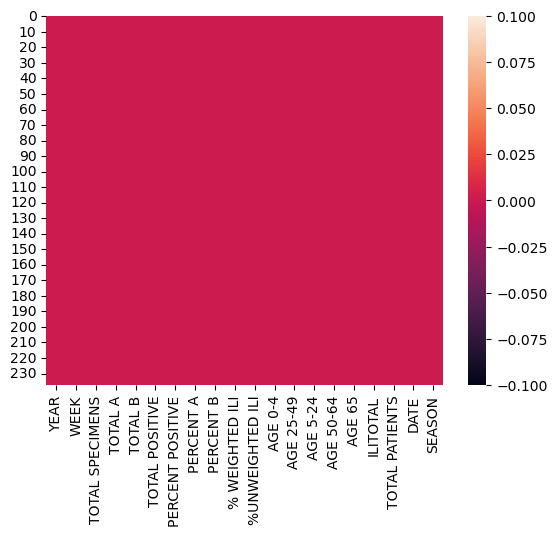

In [47]:
sns.heatmap(gripe.isnull())

In [48]:
gripe.corr(numeric_only=True)

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,TOTAL PATIENTS
YEAR,1.000000,-0.278239,0.290609,0.334697,0.489210,0.384636,0.476726,0.407550,0.514827,0.419541,0.421439,0.378971,0.556863,0.495374,0.528433,0.583959,0.524709,0.892415
WEEK,-0.278239,1.000000,-0.047505,-0.044378,-0.293504,-0.083395,-0.142943,-0.089630,-0.305365,0.053845,0.047152,0.183980,-0.060777,0.061875,-0.087461,-0.083442,0.019359,0.025379
TOTAL SPECIMENS,0.290609,-0.047505,1.000000,0.768586,0.380605,0.778015,0.773044,0.779806,0.283448,0.893674,0.890518,0.823559,0.825029,0.839646,0.803790,0.760525,0.853832,0.485062
TOTAL A,0.334697,-0.044378,0.768586,1.000000,0.345976,0.991124,0.947910,0.979688,0.238679,0.904258,0.899827,0.798243,0.872700,0.884672,0.881489,0.863141,0.898473,0.457120
TOTAL B,0.489210,-0.293504,0.380605,0.345976,1.000000,0.467636,0.577296,0.418025,0.973456,0.477375,0.479293,0.338489,0.571962,0.492216,0.539300,0.542408,0.516784,0.469788
TOTAL POSITIVE,0.384636,-0.083395,0.778015,0.991124,0.467636,1.000000,0.974826,0.982197,0.362790,0.919543,0.915641,0.799987,0.903215,0.903194,0.906867,0.890022,0.919677,0.497219
PERCENT POSITIVE,0.476726,-0.142943,0.773044,0.947910,0.577296,0.974826,1.000000,0.982160,0.489918,0.915380,0.911052,0.798882,0.907487,0.903584,0.903329,0.897606,0.921233,0.559615
PERCENT A,0.407550,-0.089630,0.779806,0.979688,0.418025,0.982197,0.982160,1.000000,0.317246,0.914469,0.909053,0.813475,0.884029,0.895165,0.888559,0.880442,0.910890,0.507399
PERCENT B,0.514827,-0.305365,0.283448,0.238679,0.973456,0.362790,0.489918,0.317246,1.000000,0.376976,0.380258,0.257662,0.478291,0.406983,0.436323,0.445086,0.423089,0.469956
% WEIGHTED ILI,0.419541,0.053845,0.893674,0.904258,0.477375,0.919543,0.915380,0.914469,0.376976,1.000000,0.998522,0.934820,0.957525,0.961538,0.939568,0.917080,0.987208,0.616487


<Axes: >

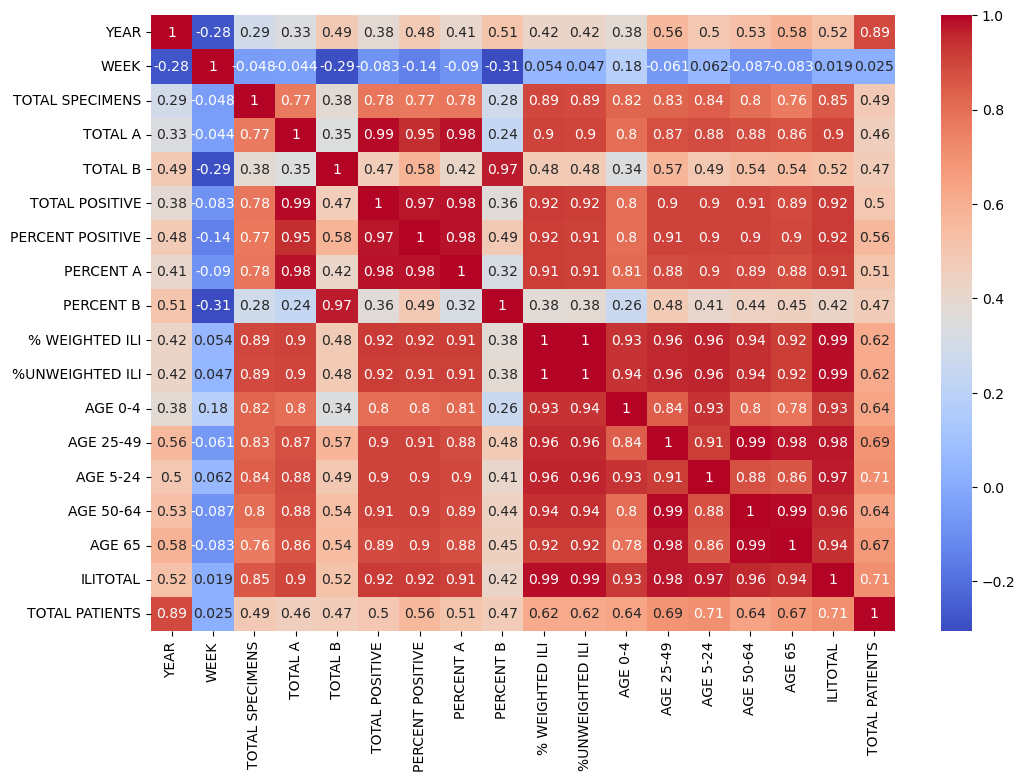

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(gripe.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

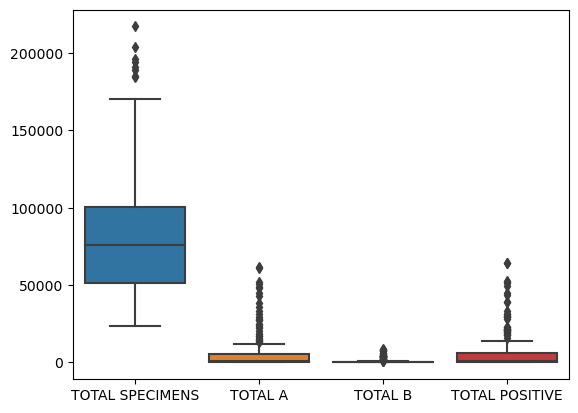

In [51]:
sns.boxplot(data=gripe[['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']])